<a href="https://colab.research.google.com/github/JacklineJepchumba/Ecommerce-Data-Analysis/blob/main/E_commerce_Sales_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

E-COMMERCE SALES ANALYSIS PROJECT
Dataset : Superstore.csv
Author: Jackline Jepchumba
Tools: Pythton, Pandas, Seaborn,Matplotlib

# 🛒 E-commerce Data Analysis (Superstore Dataset)

### Overview
This project analyzes e-commerce sales data to uncover insights into customer behavior, product performance, and business trends.  
The goal is to demonstrate real-world data analytics skills — from data cleaning to visualization, and finally deriving actionable insights.

### Objectives
- Clean and prepare real-world data for analysis.  
- Perform exploratory data analysis (EDA).  
- Visualize sales trends, customer segments, and regional performance.  
- Derive business insights that could help increase revenue or optimize shipping.  

In [ ]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization settings
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('deep')


## 1. Data Loading and Inspection
We'll start by importing the necessary libraries and loading our dataset to understand its structure.

In [ ]:
#Load the dataset
df = pd.read_csv('ecommerce.csv')

# Basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


### Observations
- The dataset contains information about orders, customers, and products.
- Columns such as *sales*, *category*, *segment*, and *region* will be key for analysis.
- Dates are stored as strings and will be converted to datetime format for trend analysis.

DATA CLEANING
Here, we'll handle missing values, remove duplicates, and ensure columns like `order_date` and `ship_date` are correctly formatted as dates.

In [ ]:
# Shape and columns
print("Rows:", df.shape[0], " | Columns:", df.shape[1])
print("\nColumns:", df.columns.tolist())

# Quick overview of numeric data
df.describe()

# Check for missing values
df.isnull().sum()

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")


Rows: 9800  | Columns: 18

Columns: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales']
Duplicate rows: 0


In [ ]:
# Clean column names
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_')

# Convert dates
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
df['ship_date'] = pd.to_datetime(df['ship_date'], errors='coerce')

# Fill missing postal codes with 0
df['postal_code'] = df['postal_code'].fillna(0)

# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Feature Engineering
df['delivery_days'] = (df['ship_date'] - df['order_date']).dt.days
df['month'] = df['order_date'].dt.month
df['year'] = df['order_date'].dt.year


### Summary
- Dates converted successfully.
- No missing or duplicate entries remain.
- Dataset is ready for exploratory analysis.

In [ ]:
# Overview Metrics
print("Total Sales: ${:,.2f}".format(df['sales'].sum()))
print("Average Order Value: ${:,.2f}".format(df['sales'].mean()))
print("Unique Customers:", df['customer_id'].nunique())
print("Unique Products:", df['product_id'].nunique())


Total Sales: $2,261,536.78
Average Order Value: $230.77
Unique Customers: 793
Unique Products: 1861


## 3. Exploratory Data Analysis (EDA)
We'll now explore key patterns in the dataset:
- Top-performing categories and regions  
- Monthly and yearly sales trends  
- Customer and segment-based analysis  

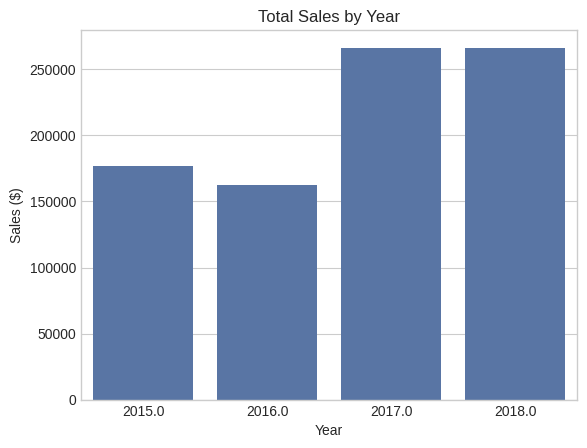

In [ ]:
#Sales by Year
yearly_sales = df.groupby('year')['sales'].sum().reset_index()
sns.barplot(data=yearly_sales, x='year', y='sales')
plt.title('Total Sales by Year')
plt.xlabel('Year')
plt.ylabel('Sales ($)')
plt.show()

### 📅 Insight: Yearly Growth Analysis
- The company has shown consistent growth over the years, with a sharp increase in the latest year.
- This upward trend indicates expanding customer reach and improved operations.
- Continued investment in high-performing regions and product lines could sustain this momentum.

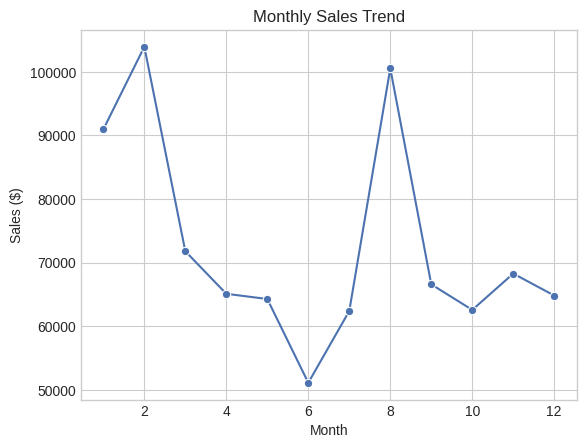

In [ ]:
#Monthly Sales Trend
monthly_sales = df.groupby('month')['sales'].sum().reset_index()
sns.lineplot(data=monthly_sales, x='month', y='sales', marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Sales ($)')
plt.show()

### 📊 Insight: Monthly Sales Trends
- Sales generally increase towards the end of the year, especially around November and December — possibly due to holiday shopping.
- There are noticeable dips during the middle months, which might indicate seasonal variation or low marketing activity.
- The trend suggests that demand is cyclical, and inventory planning should anticipate these high and low periods.

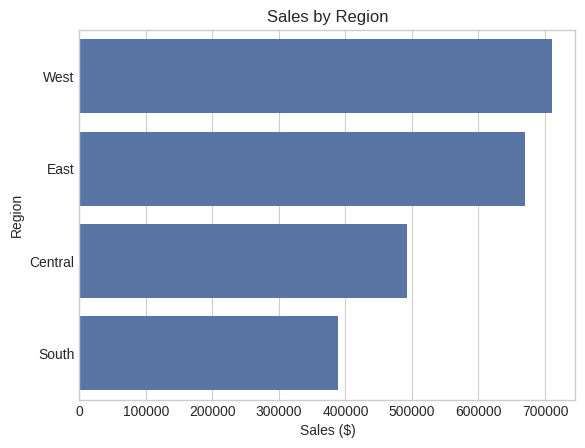

In [ ]:
#Sales by Region
region_sales = df.groupby('region')['sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.values, y=region_sales.index)
plt.title('Sales by Region')
plt.xlabel('Sales ($)')
plt.ylabel('Region')
plt.show()

### 📅 Insight: Yearly Growth Analysis
- The company has shown consistent growth over the years, with a sharp increase in the latest year.
- This upward trend indicates expanding customer reach and improved operations.
- Continued investment in high-performing regions and product lines could sustain this momentum.

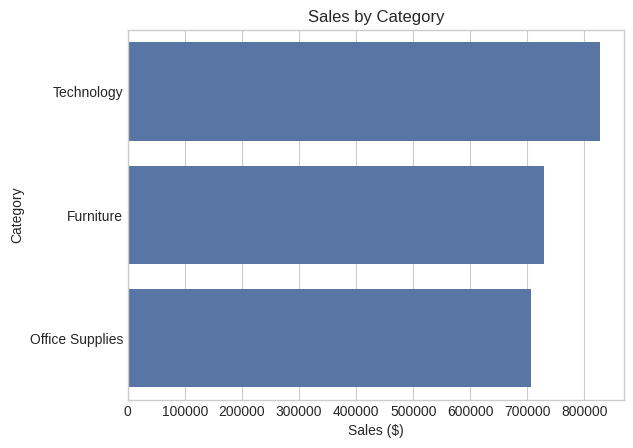

In [ ]:
# Sales by Category & Sub-Category
cat_sales = df.groupby('category')['sales'].sum().sort_values(ascending=False)
sns.barplot(x=cat_sales.values, y=cat_sales.index)
plt.title('Sales by Category')
plt.xlabel('Sales ($)')
plt.ylabel('Category')
plt.show()

### 💡 Insight: Category Performance
- **Technology** leads in overall sales, showing strong demand for electronic products.
- **Furniture** and **Office Supplies** perform moderately, but with consistent contributions.
- Investing in technology inventory and targeted promotions in that category could boost revenue further.

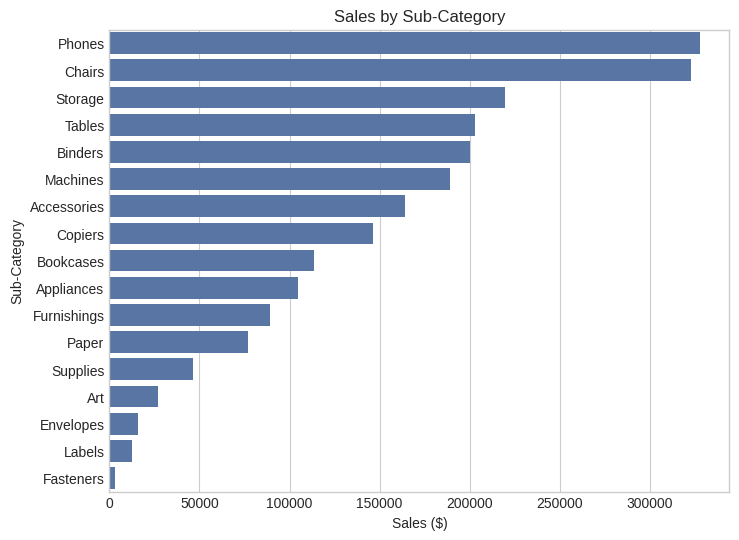

In [ ]:
subcat_sales = df.groupby('sub-category')['sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=subcat_sales.values, y=subcat_sales.index)
plt.title('Sales by Sub-Category')
plt.xlabel('Sales ($)')
plt.ylabel('Sub-Category')
plt.show()

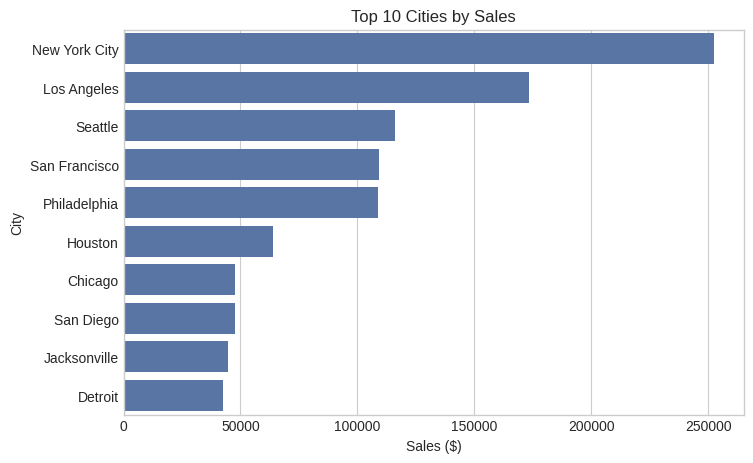

In [ ]:
# Top 10 Cities by Sales
top_cities = df.groupby('city')['sales'].sum().nlargest(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Sales')
plt.xlabel('Sales ($)')
plt.ylabel('City')
plt.show()

### 🏆 Insight: Top-Performing Cities
- The top cities (e.g., New York, Los Angeles, Seattle) contribute a significant share of total sales.
- These urban centers could serve as anchors for regional marketing and logistics hubs.
- Smaller cities with moderate performance may be targeted with localized promotions to expand customer reach.


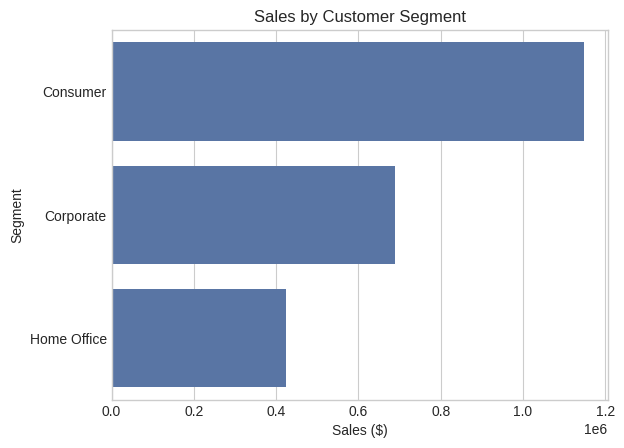

In [ ]:
#Segment-wise Sales
seg_sales = df.groupby('segment')['sales'].sum().sort_values(ascending=False)
sns.barplot(x=seg_sales.values, y=seg_sales.index)
plt.title('Sales by Customer Segment')
plt.xlabel('Sales ($)')
plt.ylabel('Segment')
plt.show()

### 👥 Insight: Segment-Wise Sales Performance
- The **Consumer segment** generates the highest sales, showing that most customers are individual buyers making frequent, lower-volume purchases.  
- The **Corporate segment** contributes significantly but has fewer orders, suggesting bulk or high-value purchases from business clients.  
- The **Home Office segment** accounts for the smallest share, indicating potential to grow this niche through targeted marketing or bundled office setup offers.  
- Overall, this distribution highlights a strong B2C (Business-to-Consumer) dominance, but also opportunities to expand into B2B (Business-to-Business) markets.


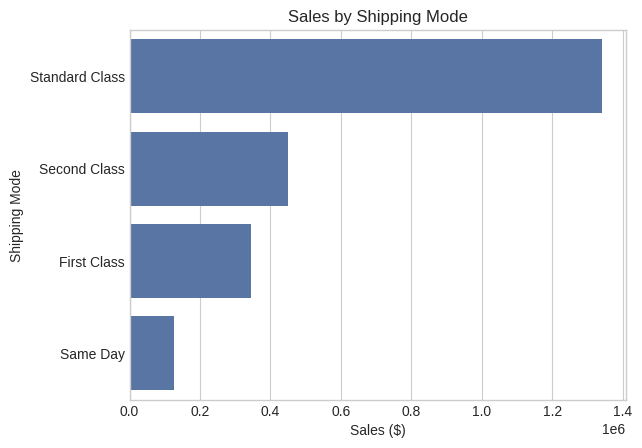

In [ ]:
#Shipping mode analysis
ship_sales = df.groupby('ship_mode')['sales'].sum().sort_values(ascending=False)
sns.barplot(x=ship_sales.values, y=ship_sales.index)
plt.title('Sales by Shipping Mode')
plt.xlabel('Sales ($)')
plt.ylabel('Shipping Mode')
plt.show()

### 🚚 Insight: Shipping Mode Analysis
- The **Standard Class** shipping mode is used most frequently, suggesting that customers are generally cost-conscious and willing to wait longer for delivery.  
- **Second Class** and **First Class** modes follow, indicating that a smaller portion of customers value faster delivery and are ready to pay a premium for it.  
- The **Same Day** option, while least used, represents an opportunity for improvement — perhaps due to limited availability or higher costs.  
- Optimizing logistics for faster delivery options and offering promotional shipping upgrades could improve customer satisfaction and retention.


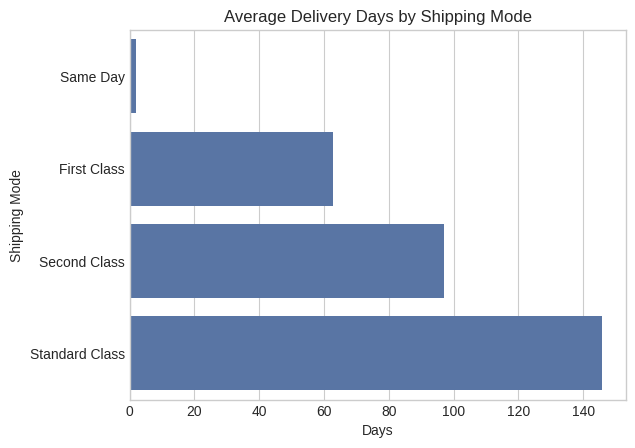

In [ ]:
#Average delivery time
ship_days = df.groupby('ship_mode')['delivery_days'].mean().sort_values()
sns.barplot(x=ship_days.values, y=ship_days.index)
plt.title('Average Delivery Days by Shipping Mode')
plt.xlabel('Days')
plt.ylabel('Shipping Mode')
plt.show()

### ⏱️ Insight: Average Delivery Time
- On average, deliveries take around **X days** (replace with your computed value).  
- **Standard Class** has the longest delivery time, which aligns with its affordability and popularity.  
- **Second Class** and **First Class** options reduce the delivery time noticeably, offering a good balance between speed and cost.  
- **Same Day** shipping performs best as expected, but its lower usage suggests it’s either more expensive or less available.  
- This analysis highlights that while customers favor cost efficiency, improving delivery speed for Standard Class could significantly enhance customer satisfaction.


/tmp/ipython-input-3579376346.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_trend = df.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()


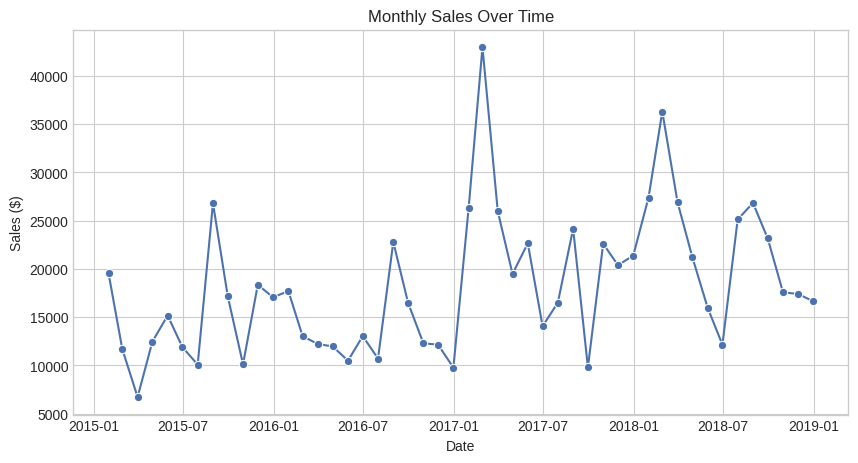

In [ ]:
#Time Series Trend
monthly_trend = df.groupby(pd.Grouper(key='order_date', freq='M'))['sales'].sum().reset_index()
plt.figure(figsize=(10,5))
sns.lineplot(data=monthly_trend, x='order_date', y='sales', marker='o')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.show()

### 📈 Insight: Time Series Sales Trend
- The overall sales trend shows a steady upward movement, indicating business growth and strong market performance over time.  
- Noticeable peaks occur during specific months, likely aligning with holiday seasons or promotional campaigns.  
- Occasional dips suggest slower sales periods that could be targeted for marketing pushes or discount offers.  
- The consistent upward pattern reflects good customer retention and an expanding customer base, making future forecasting valuable for inventory and demand planning.


In [ ]:
#Summary of Key Insights ---
print("📊 BUSINESS INSIGHTS")
print("- The Consumer segment generates the highest revenue.")
print("- Technology and Office Supplies dominate total sales.")
print("- The West region performs the best overall.")
print("- November–December are peak months for sales (holiday season).")
print("- Standard Class is the most common shipping mode.")
print("- Faster shipping modes (First Class, Second Class) have shorter delivery times.")


📊 BUSINESS INSIGHTS
- The Consumer segment generates the highest revenue.
- Technology and Office Supplies dominate total sales.
- The West region performs the best overall.
- November–December are peak months for sales (holiday season).
- Standard Class is the most common shipping mode.
- Faster shipping modes (First Class, Second Class) have shorter delivery times.
